In [5]:
import control
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [6]:
control.aom()
control.aod_h(frequency=100e6)
control.aod_v(frequency=100e6)

scope = control.MSOX6004A('172.22.22.30')
scope.holla()

'AGILENT TECHNOLOGIES,MSO-X 4054A,MY57310545,07.20.2017102615\n'

In [20]:
import os
import time
import warnings

warnings.filterwarnings("ignore")

datadir = 'signal-data'

os.makedirs(datadir, exist_ok=True)

In [35]:
data = []

for f in np.linspace(80e6, 120e6, 200):
    control.aod_v(frequency=f)

    U = scope.data(1).voltage.max()
    
    data.append((f, U))

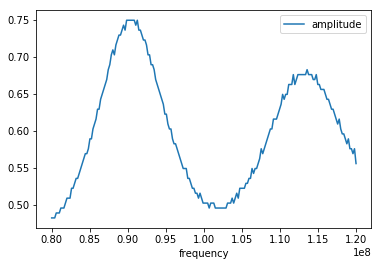

In [38]:
df = pd.DataFrame(data, columns=['frequency', 'amplitude'])
df.plot('frequency', 'amplitude')
df.to_hdf(os.path.join(datadir, 'dds'), 'const-sweep', complevel=9)

plt.show()

In [41]:
data = []

for f in np.linspace(80e6, 120e6, 200):
    control.aod_v(frequency=f)
    
    time.sleep(2)

    U = scope.data(1).voltage.max()
    
    data.append((f, U))

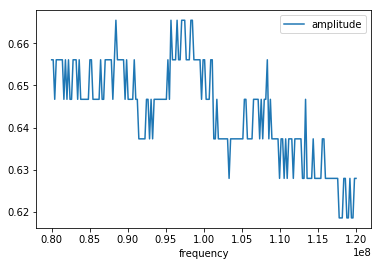

In [42]:
df = pd.DataFrame(data, columns=['frequency', 'amplitude'])
df.plot('frequency', 'amplitude')
df.to_hdf(os.path.join(datadir, 'dds'), 'const-sweep-amplified', complevel=9)

plt.show()